Ïù¥Î≤à Í∞ïÏùòÏóêÏÑúÎäî ÍµêÏû¨ Example Example 6.5: Windy GridworldÎ•º Íµ¨ÌòÑÌï©ÎãàÎã§. Ïö∞ÏÑ† Î¨∏Ï†úÎ•º Ïûò ÏùΩÏñ¥ Î≥¥ÏÑ∏Ïöî. 
  - ÏÑ±Ïã†Ïó¨ÏûêÎåÄÌïôÍµê AIÏúµÌï©ÌïôÎ∂Ä Í∞ïÌôîÌïôÏäµ ÏàòÏóÖÏùÑ ÏúÑÌï¥ ÏûëÏÑ±Ìïú ÏûêÎ£åÏûÖÎãàÎã§. 2025ÎÖÑ 8Ïõî 26Ïùº Ï¥àÏïàÏùÑ ÏûëÏÑ±ÌïòÏòÄÍ≥†, 2025ÎÖÑ 10Ïõî 3Ïùº ÏóÖÎç∞Ïù¥Ìä∏ÌïòÏòÄÏäµÎãàÎã§. 
  - ÏΩîÎìúÎäî 2018ÎÖÑ ÏûëÏÑ±Ìïú ÏΩîÎìúÎ•º Î∞îÌÉïÏúºÎ°ú Claude ProÎ•º Ïù¥Ïö©Ìï¥ Î≥ÄÏàòÎ™Ö Îì±ÏùÑ ÏàòÏ†ïÌïòÏòÄÏäµÎãàÎã§. 

# 1. Exercise 6.5: Windy Gridworld 
ÏÑ§Î™ÖÏùÑ Ïûò ÏùΩÍ≥†, Î¨∏Ï†úÎ•º Ï†ïÏùòÌï©ÎãàÎã§. 'Stochastic wind'Îäî Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Ï†ïÏùòÌï¥ÎèÑ ÏÉÅÍ¥Ä ÏóÜÏñ¥Ïöî. 

Exercise 6.10: Stochastic Wind (programming) Re-solve the windy gridworld task with King‚Äôs moves, assuming that the e‚Üµect of the wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time you move exactly according to these values, as in the previous exercise, but also a third of the time you move one cell above that, and another third of the time you move one cell below that. For example, if you are one cell to the right of the goal and you move left, then one-third of the time you move one cell above the goal, one-third of the time you move two cells above the goal, and one-third of the time you move to the goal.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


GRID_HEIGHT = 7
GRID_WIDTH = 10

# Î∞îÎûåÏùò ÏÑ∏Í∏∞(Í∞Å Ïó¥Ïóê ÎåÄÌïú yÏ∂ï Ïù¥Îèô)ÏûÖÎãàÎã§.
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0] # (x=3,4,5Îäî 1Ïπ∏, x=6,7ÏùÄ 2Ïπ∏, x=8ÏùÄ 1Ïπ∏ ÏúÑÎ°ú Î∞ÄÎ¶º)

# ÏãúÏûë Î∞è Î™©Ìëú ÏÉÅÌÉúÏûÖÎãàÎã§.
START_STATE = (3, 0) # (y, x)
GOAL_STATE = (3, 7)  # (y, x)

# ÌñâÎèôÏùÑ Ï†ïÏùò(dy, dx)Ìï¥ Ï§çÎãàÎã§. ÏòàÏ†úÏùò 4Î∞©Ìñ•, 8Î∞©Ìñ•, 8Î∞©Ìñ•+Ï†ïÏßÄ ÌñâÎèôÏùÑ Î™®Îëê Íµ¨ÌòÑÌï¥ Î¥ÖÎãàÎã§.
# (yÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ ÏïÑÎûòÎ°ú, yÍ∞Ä Í∞êÏÜåÌïòÎ©¥ ÏúÑÎ°ú)
# Up, Down, Left, Right
ACTIONS_4 = [(-1, 0), (1, 0), (0, -1), (0, 1)] 
# King's Moves: Up, Down, Left, Right, Up-Left, Up-Right, Down-Left, Down-Right
ACTIONS_8 = ACTIONS_4 + [(-1, -1), (-1, 1), (1, -1), (1, 1)]
# 8Î∞©Ìñ• + Stay
ACTIONS_9 = ACTIONS_8 + [(0, 0)]

# Sarsa ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶òÏóêÏÑúÎèÑ ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö©Ìï©ÎãàÎã§.
ALPHA = 0.5
EPSILON = 0.1
GAMMA = 1.0 # Given discount factorÏûÖÎãàÎã§.

REWARD_PER_STEP = -1
REWARD_GOAL = 0

def env_step_stochastic_wind(state, action_idx, current_actions):
    """
    Stocasitc wind Î¨∏Ï†úÏóêÏÑúÏùò Î∞îÎûåÏùÑ Íµ¨ÌòÑÌï©ÎãàÎã§. 
    Î∞îÎûåÏùÄ ÌèâÍ∑†Í∞íÏóêÏÑú -1, 0, +1Î°ú Î≥ÄÎèôÌï† Ïàò ÏûàÏäµÎãàÎã§ (Í∞ÅÍ∞Å 1/3 ÌôïÎ•†).
    """
    y, x = state
    dy, dx = current_actions[action_idx]

    # ÌñâÎèôÏóê Îî∞Î•∏ Îã§Ïùå ÏúÑÏπò(Î∞îÎûå Ï†ÅÏö© Ï†Ñ)Ïù¥Í≥†,
    next_y_after_action = y + dy
    next_x_after_action = x + dx

    # Î∞îÎûå Ï†ÅÏö© ÌõÑ ÏûÖÎãàÎã§.
    final_next_y = next_y_after_action
    final_next_x = next_x_after_action

    if 0 <= final_next_x < GRID_WIDTH: # Í∑∏Î¶¨Îìú ÎÇ¥Ïùò xÏ¢åÌëúÏùº ÎïåÎßå Î∞îÎûå Ï†ÅÏö©Ìï©ÎãàÎã§. Î∞îÎûåÏù¥ Î∂ÄÎäî ÏúÑÏπòÍ∞Ä ÏûàÏßÄÏöî?
        mean_wind_effect = WIND[final_next_x]
        
        # ÌôïÎ•†Ï†ÅÏúºÎ°ú Î∞îÎûåÏùò Ìö®Í≥º Í≤∞Ï†ï(-1, 0, +1 Î≥ÄÎèô)Ìï©ÎãàÎã§.
        rand_val = np.random.rand()
        if rand_val < 1/3:                                      # 1/3 ÌôïÎ•†Î°ú Î∞îÎûå Ìö®Í≥ºÍ∞Ä ÌèâÍ∑†Î≥¥Îã§ 1 Í∞êÏÜåÌï©ÎãàÎã§.
            stochastic_wind_effect = mean_wind_effect - 1
        elif rand_val < 2/3:                                    # 1/3 ÌôïÎ•†Î°ú Î∞îÎûå Ìö®Í≥ºÍ∞Ä ÌèâÍ∑†Í≥º ÎèôÏùºÌï©ÎãàÎã§.
            stochastic_wind_effect = mean_wind_effect
        else:                                                   # 1/3 ÌôïÎ•†Î°ú Î∞îÎûå Ìö®Í≥ºÍ∞Ä ÌèâÍ∑†Î≥¥Îã§ 1 Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
            stochastic_wind_effect = mean_wind_effect + 1
        
        final_next_y -= stochastic_wind_effect                  # Í∑∏Î¶º Í∑∏Î¶¨Îäî Í≤å Ï°∞Í∏à Ìó∑ÍπîÎ¶¥ Ïàò ÏûàÎäîÎç∞, ÍµêÏû¨Ïùò Í∑∏Î¶ºÏ≤òÎüº Î∞îÎûåÏù¥ ÏúÑÎ°ú Î∂ÑÎã§Îäî Í≤ÉÏùÄ y Ïù∏Îç±Ïä§ Í∞êÏÜåÏãúÌÇµÎãàÎã§. Î∂ÄÌò∏Î•º ÎßûÏ∂îÎäî Í±¥ Î≥∏Ïù∏Ïùò ÏïåÍ≥†Î¶¨Ï¶òÏóê ÎßûÍ≤å ÌïòÎ©¥ ÎèºÏöî.

    # Í≤ΩÍ≥Ñ Ï≤òÎ¶¨ÎèÑ Ìï¥ Ï§çÎãàÎã§.
    final_next_y = max(0, min(final_next_y, GRID_HEIGHT - 1))
    final_next_x = max(0, min(final_next_x, GRID_WIDTH - 1))

    next_state = (final_next_y, final_next_x)

    reward = REWARD_PER_STEP
    if next_state == GOAL_STATE:
        reward = REWARD_GOAL       

    return next_state, reward

def plot_results(results, labels, title, x_limit=8000):
    plt.figure(figsize=(12, 6))
    
    for i, res in enumerate(results):
        cumulative_steps = np.cumsum(res)
        # x_limitÏùÑ ÎÑòÏßÄ ÏïäÎäî ÏóêÌîºÏÜåÎìúÎßå Í∑∏Î¶¨ÎäîÎç∞, ÏïÑÎßà Í∑∏Î†§Î≥¥Î©¥ ÏïåÍ≤†ÏßÄÎßå ÎÑàÎ¨¥ Í∏¥ ÏóêÌîºÏÜåÎìúÎ•º ÍµêÏû¨ÏôÄ Í∞ôÏùÄ Í∑∏ÎûòÌîÑÎûë Îã§Î•¥Í≤å Ïïà ÏòàÏÅòÍ≤å ÎÇòÏôÄÏÑú Ï∂îÍ∞ÄÌï©ÎãàÎã§. 
        episodes_within_limit = np.sum(cumulative_steps <= x_limit)
        
        plt.plot(cumulative_steps[:episodes_within_limit], np.arange(1, episodes_within_limit + 1), label=labels[i])
    
    plt.xlabel('Time Steps (Total Steps)')
    plt.ylabel('Episodes')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(0, x_limit)
    plt.show()

def plot_trajectory(Q, actions_set, start_state, goal_state, title="Optimal Trajectory"): # ÏµúÏ†Å Q Í∞íÏóê Îî∞Î•∏ ÏóêÏù¥Ï†ÑÌä∏Ïùò ÏõÄÏßÅÏûÑ Í∂§Ï†ÅÏùÑ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    plt.figure(figsize=(GRID_WIDTH, GRID_HEIGHT + 1.0))
    
    plt.imshow(np.zeros((GRID_HEIGHT, GRID_WIDTH)), cmap='bone_r', origin='upper', 
               extent=[-0.5, GRID_WIDTH-0.5, GRID_HEIGHT-0.5, -0.5])    # extent: [left, right, bottom, top]
    
    # Î∞îÎûå ÌôîÏÇ¥ÌëúÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    for x in range(GRID_WIDTH):
        if WIND[x] > 0:
            plt.arrow(x, GRID_HEIGHT - 0.5, 0, -0.4 * WIND[x], color='blue', head_width=0.2, head_length=0.2, alpha=0.6)
            plt.text(x, GRID_HEIGHT + 0.2, str(WIND[x]), color='blue', ha='center', va='top', fontsize=10)

    plt.text(start_state[1], start_state[0], 'S', color='green', ha='center', va='center', fontsize=12, weight='bold')
    plt.text(goal_state[1], goal_state[0], 'G', color='red', ha='center', va='center', fontsize=12, weight='bold')
    plt.hlines(y=np.arange(-0.5, GRID_HEIGHT), xmin=-0.5, xmax=GRID_WIDTH-0.5, color='black', linewidth=0.5)
    plt.vlines(x=np.arange(-0.5, GRID_WIDTH), ymin=-0.5, ymax=GRID_HEIGHT-0.5, color='black', linewidth=0.5)
    plt.xticks([]) 
    plt.yticks([]) 
    
    path_x = [start_state[1]]
    path_y = [start_state[0]]

    max_steps = 1000 
    current_iter_state = START_STATE
    
    # Í∑∏ÎÉ• Íµ¨ÌòÑÏùÑ ÌïòÎ©¥ Î¨¥Ìïú Î£®ÌîÑÏóê Îπ†ÏßÄÍ∏∞ ÏâΩÏäµÎãàÎã§. Ïù¥Ï†ÑÏóê Î∞©Î¨∏ÌñàÎçò ÏÉÅÌÉúÎ•º Ï∂îÏ†ÅÌï† Ïàò ÏûàÎèÑÎ°ù Íµ¨ÌòÑÌï¥ Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§. Ïù¥Îü∞ Î∂ÄÎ∂ÑÏùÄ ÏßÅÏ†ë ÏΩîÎî©ÏùÑ Ìï¥ Î¥êÏïº ÎäêÍª¥ ÏßÄÍ≤†ÏßÄÏöî?
    visited_states = set() 

    for step_count in range(max_steps): 
        if current_iter_state == GOAL_STATE:
            break
        if current_iter_state in visited_states: # Î¨¥Ìïú Î£®ÌîÑ Í∞êÏßÄ(Í∞ôÏùÄ ÏÉÅÌÉúÎ•º Ïó¨Îü¨ Î≤à Î∞©Î¨∏ÌïòÎäî Í≤ΩÏö∞)Ìï¥ÏÑú Îπ†Ï†∏ÎÇòÏòµÎãàÎã§.
            # print(f"Trajectory stuck in a loop at state {current_iter_state} after {step_count} steps.") # Ïù¥Í±¥ ÎîîÎ≤ÑÍπÖÌï† Îïå ÏçºÎçò Î°úÍ∑∏ÏûÖÎãàÎã§. ÌïÑÏöîÌïòÎ©¥ ÏºúÏÑú Î≥¥ÏÑ∏Ïöî.
            break
        visited_states.add(current_iter_state)

        y, x = current_iter_state
        # ÏµúÏ†Å Ï†ïÏ±Ö (Í∞ÄÏû• ÎÜíÏùÄ Q Í∞í)Ïóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉùÌï©ÎãàÎã§.
        best_action_idx = np.argmax(Q[y, x, :])
        dy, dx = actions_set[best_action_idx]
        
        # Îã§Ïùå ÏÉÅÌÉú Í≥ÑÏÇ∞(Î∞îÎûå Ìè¨Ìï®)ÌïòÍ≥†,
        next_y_unwind = y + dy
        next_x_unwind = x + dx

        next_y_winded = next_y_unwind
        if 0 <= next_x_unwind < GRID_WIDTH:
            # Í∑∏Î¶º Í∑∏Î¶¥ ÎïåÎäî plot_trajectoryÏóêÏÑúÎäî Í≤∞Ï†ïÎ°†Ï†Å Î∞îÎûåÎßå Ï†ÅÏö©Ìï©ÎãàÎã§. Ïã§Ï†ú ÌòÑÏÉÅÏóêÏÑúÎäî stochastic windÎ•º Ï†ÅÏö©ÌïòÏßÄÎßå, Í∂§Ï†ÅÏùÑ Í∑∏Î¶¥ ÎïåÎäî, Í∑∏Îü¨ÎãàÍπå Î≥¥Í≥†ÏÑúÏóê Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶∞Îã§Í≥† ÏÉùÍ∞ÅÌïòÎ©¥ Í≤∞Ï†ïÎ°†Ï†Å Î∞îÎûåÏù¥ Îçî ÏßÅÍ¥ÄÏ†ÅÏù¥Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
            next_y_winded -= WIND[next_x_unwind]

        final_next_y = max(0, min(next_y_winded, GRID_HEIGHT - 1))
        final_next_x = max(0, min(next_x_unwind, GRID_WIDTH - 1))
        
        # Í∂§Ï†ÅÏùÑ ÏÑ†ÏúºÎ°ú Í∑∏Î¶¨Í∏∞Ï£ºÏñ¥Ïïº ÌïòÎØÄÎ°ú,
        plt.plot([current_iter_state[1], final_next_x], [current_iter_state[0], final_next_y], 'r-o', markersize=3, linewidth=1)
        
        current_iter_state = (final_next_y, final_next_x)
        path_x.append(current_iter_state[1])
        path_y.append(current_iter_state[0])
    
    # Í∑∏Î¶¨Í≥† ÏµúÏ¢Ö Í∂§Ï†ÅÏùÑ ÍµµÏùÄ ÏÑ†ÏúºÎ°ú Îã§Ïãú Í∑∏Î†§ Í∞ïÏ°∞Ìï©ÎãàÎã§.
    plt.plot(path_x, path_y, 'r-', linewidth=2, marker='o', markersize=4)

    plt.title(title)
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

## 1. Sarsa (on-policy TD control) for estimating $Q\approx q_\ast$

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8000/8000 [00:01<00:00, 7639.57it/s]


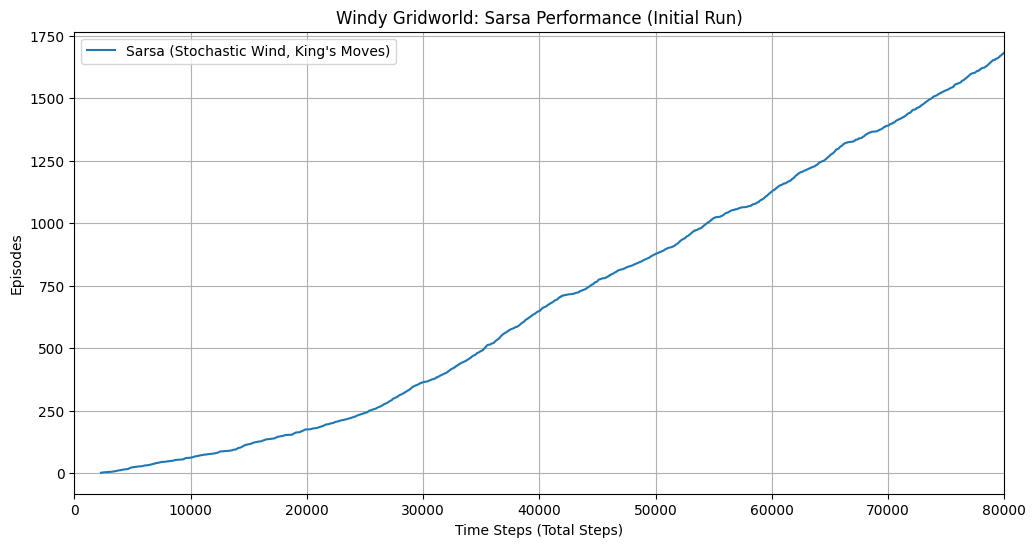


Optimal Trajectory with Sarsa (Stochastic Wind):


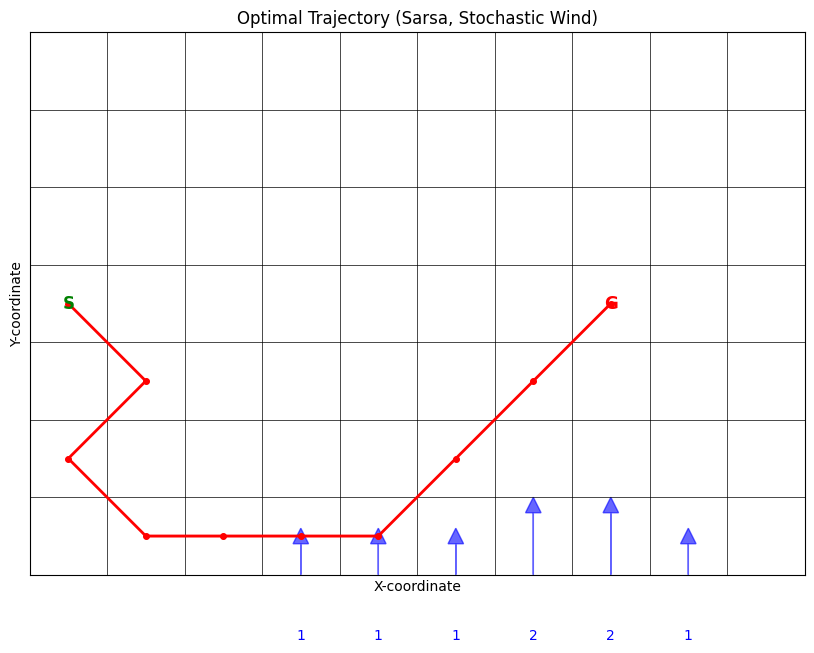

In [3]:
def sarsa_agent_stochastic_wind(num_episodes, actions_set):
    num_actions = len(actions_set)
    Q = np.zeros((GRID_HEIGHT, GRID_WIDTH, num_actions))
    episode_steps = []

    for episode in tqdm(range(num_episodes)):
        current_state = START_STATE
        steps = 0

        # epsilon-greedy Ï†ïÏ±ÖÏóê Îî∞Îùº Ï¥àÍ∏∞ ÌñâÎèô ÏÑ†ÌÉùÌï©ÎãàÎã§.
        if np.random.rand() < EPSILON:
            current_action_idx = np.random.randint(num_actions)
        else:
            current_action_idx = np.argmax(Q[current_state[0], current_state[1], :])

        while current_state != GOAL_STATE:
            steps += 1
            if steps > 5000: 
                break 
            
            next_state, reward = env_step_stochastic_wind(current_state, current_action_idx, actions_set)
            
            # Îã§Ïùå ÏÉÅÌÉúÏóêÏÑú epsilon-greedy Ï†ïÏ±ÖÏóê Îî∞Îùº Îã§Ïùå ÌñâÎèô ÏÑ†ÌÉùÌï©ÎãàÎã§. On-policyÏ£†?
            if next_state == GOAL_STATE:
                next_action_idx = None 
            elif np.random.rand() < EPSILON:
                next_action_idx = np.random.randint(num_actions)
            else:
                next_action_idx = np.argmax(Q[next_state[0], next_state[1], :])

            # Sarsa ÏóÖÎç∞Ïù¥Ìä∏ÏûÖÎãàÎã§. ÍµêÏû¨Îûë ÏµúÎåÄÌïú ÎèôÏùºÌïòÍ≤å Î≥ÄÏàòÎ™Ö Îì±ÏùÑ ÎßûÏ∂∞ Ï£ºÏóàÏúºÎãà ÏùΩÍ∏∞ Ïâ¨Ïö∏ Í±∞ÏòàÏöî.
            old_q = Q[current_state[0], current_state[1], current_action_idx]
            target_q_prime = Q[next_state[0], next_state[1], next_action_idx] if next_state != GOAL_STATE else 0

            Q[current_state[0], current_state[1], current_action_idx] = old_q + ALPHA * (reward + GAMMA * target_q_prime - old_q)

            # ÏÉÅÌÉú Î∞è ÌñâÎèô ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ≥†, Îã§Ïùå Ïä§ÌÉ≠ÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§.
            current_state = next_state
            current_action_idx = next_action_idx
            
            if next_action_idx is None and current_state == GOAL_STATE:
                break

        episode_steps.append(steps)
    
    return episode_steps, Q


NUM_EPISODES = 8000 # ÌòπÏãú Í≤∞Í≥ºÍ∞Ä Ïûò ÎÇòÏò§ÏßÄ ÏïäÎäîÎã§Î©¥ optimal Í∂§Ï†ÅÏùÑ Ï∞æÏßÄ Î™ªÌïú Í≤ÉÏùº Ïàò ÏûàÏúºÎãà, ÏóêÌîºÏÜåÎìúÎ•º ÎäòÎ†§ Î≥¥ÏÑ∏Ïöî.
episode_steps_stochastic_8, Q_stochastic_8 = sarsa_agent_stochastic_wind(NUM_EPISODES, ACTIONS_8)

all_results_sarsa_initial = [episode_steps_stochastic_8]
all_labels_sarsa_initial = ['Sarsa (Stochastic Wind, King\'s Moves)']
plot_results(all_results_sarsa_initial, all_labels_sarsa_initial, 'Windy Gridworld: Sarsa Performance (Initial Run)', x_limit=NUM_EPISODES * 10)

print("\nOptimal Trajectory with Sarsa (Stochastic Wind):")
plot_trajectory(Q_stochastic_8, ACTIONS_8, START_STATE, GOAL_STATE, "Optimal Trajectory (Sarsa, Stochastic Wind)")

# 2. Q-learning, for estimating $Q \approx q_\ast$

Q-learningÏúºÎ°ú Î¨∏Ï†úÎ•º ÌíÄÏñ¥ Î¥ÖÏãúÎã§. 6Ïû•ÏóêÏÑú ÏÇ¨Ïö©Ìïú ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Îã§Î•∏ Î¨∏Ï†úÏóê Ï†ÅÏö©Ìï¥ Î≥¥Î©¥ÏÑú ÏùµÏàôÌï¥ ÏßÄÎ©¥ Îê©ÎãàÎã§. 

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8000/8000 [00:01<00:00, 4000.26it/s]


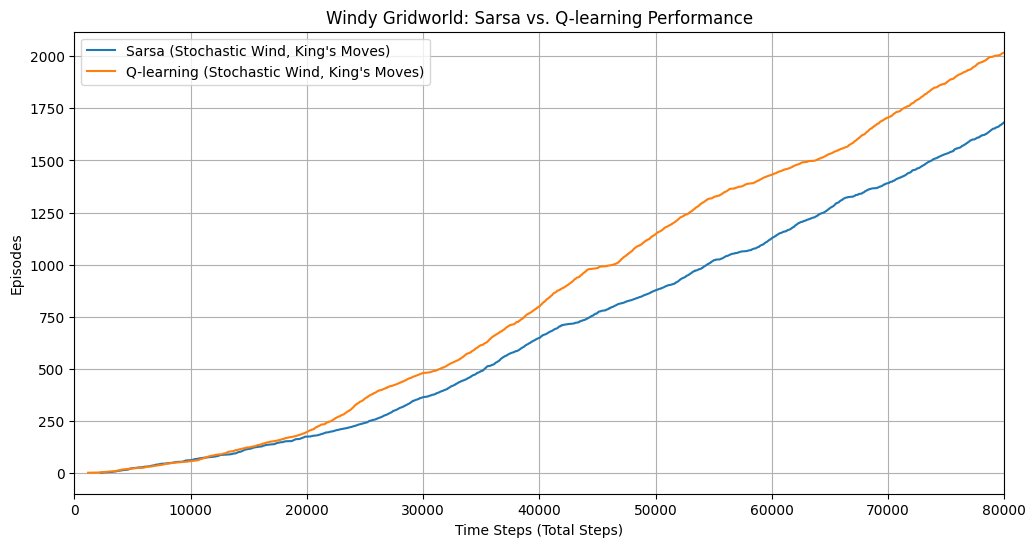


Optimal Trajectory with Q-learning (Stochastic Wind):


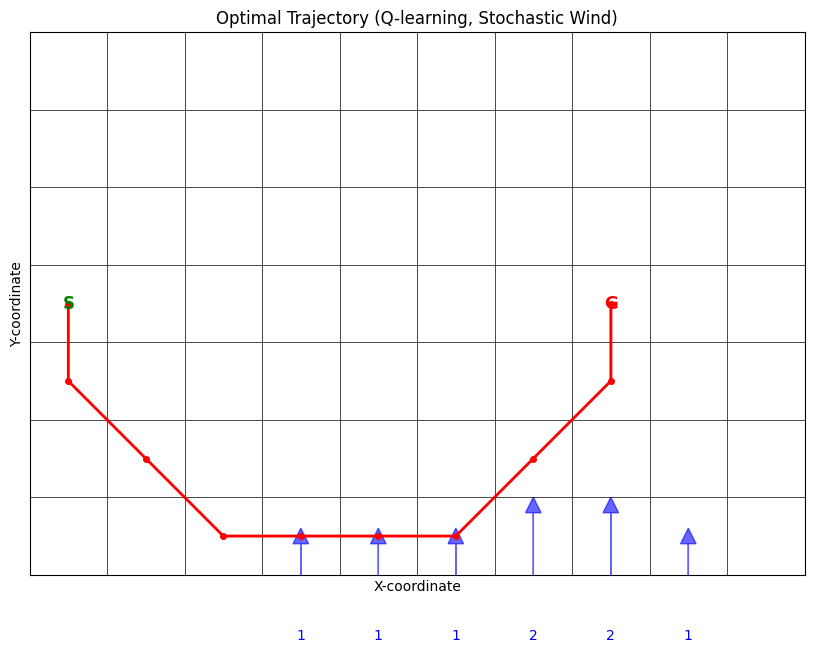

In [6]:
def q_learning_agent(num_episodes, actions_set):
    num_actions = len(actions_set)
    Q = np.zeros((GRID_HEIGHT, GRID_WIDTH, num_actions))
    episode_steps = []

    for episode in tqdm(range(num_episodes)):
        current_state = START_STATE
        steps = 0

        while current_state != GOAL_STATE:
            steps += 1
            if steps > 5000: 
                break 

            # SarsaÏôÄ ÎòëÍ∞ôÏù¥ epsilon-greedy Ï†ïÏ±ÖÏóê Îî∞Îùº ÌòÑÏû¨ ÌñâÎèô ÏÑ†ÌÉùÌï©ÎãàÎã§. Ïù¥Í≤å Í≤∞Íµ≠ behavior policyÍ∞Ä Îê©ÎãàÎã§.
            if np.random.rand() < EPSILON:
                current_action_idx = np.random.randint(num_actions)
            else:
                current_action_idx = np.argmax(Q[current_state[0], current_state[1], :])

            next_state, reward = env_step_stochastic_wind(current_state, current_action_idx, actions_set)

            # Q-learning ÏóÖÎç∞Ïù¥Ìä∏ÏûÖÎãàÎã§. ÏóÖÎç∞Ïù¥Ìä∏Îäî target policy (greedy policy)Î•º Îî∞Î¶ÖÎãàÎã§. targetÍ≥º behaviorÍ∞Ä Îã§Î•¥ÏßÄÏöî? Off-policyÏûÖÎãàÎã§.
            old_q = Q[current_state[0], current_state[1], current_action_idx]
            
            # Îã§Ïùå ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Q Í∞í ÏÑ†ÌÉùÌï©ÎãàÎã§. Íµ¨ÌòÑÏùÑ ÏúÑÌï¥ Î™©Ìëú ÏÉÅÌÉúÏóê ÎèÑÎã¨ÌïòÎ©¥ Îã§Ïùå Q Í∞íÏùÄ 0Ïù¥ Îê®
            max_next_q = np.max(Q[next_state[0], next_state[1], :]) if next_state != GOAL_STATE else 0

            Q[current_state[0], current_state[1], current_action_idx] = old_q + ALPHA * (reward + GAMMA * max_next_q - old_q)

            current_state = next_state
            
            if current_state == GOAL_STATE:
                break

        episode_steps.append(steps)
    
    return episode_steps, Q

NUM_EPISODES = 8000
episode_steps_q_learning, Q_q_learning = q_learning_agent(NUM_EPISODES, ACTIONS_8)

all_results_q_comp = [episode_steps_stochastic_8, episode_steps_q_learning]
all_labels_q_comp = ['Sarsa (Stochastic Wind, King\'s Moves)', 'Q-learning (Stochastic Wind, King\'s Moves)']
plot_results(all_results_q_comp, all_labels_q_comp, 'Windy Gridworld: Sarsa vs. Q-learning Performance', x_limit=NUM_EPISODES * 10)

print("\nOptimal Trajectory with Q-learning (Stochastic Wind):")
plot_trajectory(Q_q_learning, ACTIONS_8, START_STATE, GOAL_STATE, "Optimal Trajectory (Q-learning, Stochastic Wind)")

## 4. Double Q-learning, for estimating $ùëÑ_1‚âàùëÑ_2‚âàùëû_‚àó$

In [ ]:
def double_q_learning_agent(num_episodes, actions_set):
    num_actions = len(actions_set)
    QA = np.zeros((GRID_HEIGHT, GRID_WIDTH, num_actions))
    QB = np.zeros((GRID_HEIGHT, GRID_WIDTH, num_actions))
    episode_steps = []

    for episode in tqdm(range(num_episodes)):
        current_state = START_STATE
        steps = 0

        while current_state != GOAL_STATE:
            steps += 1
            if steps > 5000: 
                break 

            # Sutton & Barto Ï±ÖÏùò pseudo codeÎ•º Î≥¥Î©¥ QA+QBÏùò Ìï©ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
            avg_Q = (QA[current_state[0], current_state[1], :] + QB[current_state[0], current_state[1], :]) / 2.0
            
            if np.random.rand() < EPSILON:
                current_action_idx = np.random.randint(num_actions)
            else:
                current_action_idx = np.argmax(avg_Q)

            next_state, reward = env_step_stochastic_wind(current_state, current_action_idx, actions_set)

            # Îëê Q-ÌÖåÏù¥Î∏î Ï§ë ÌïòÎÇòÎ•º Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌïòÏó¨ ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.
            if np.random.rand() < 0.5:
                # QAÎ°ú Îã§Ïùå ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏû• Ï¢ãÏùÄ ÌñâÎèô A'ÏùÑ ÏÑ†ÌÉùÌïòÎ©¥,
                best_action_for_QA = np.argmax(QA[next_state[0], next_state[1], :])
                # QBÎ°ú ÏÑ†ÌÉùÎêú A'Ïùò QÍ∞í Ï∂îÏ†ïÌïòÍ≥†,
                target_q_prime = QB[next_state[0], next_state[1], best_action_for_QA] if next_state != GOAL_STATE else 0
                
                QA[current_state[0], current_state[1], current_action_idx] += ALPHA * (reward + GAMMA * target_q_prime - QA[current_state[0], current_state[1], current_action_idx])
            else: 
                # QBÎ°ú Îã§Ïùå ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏû• Ï¢ãÏùÄ ÌñâÎèô A'ÏùÑ ÏÑ†ÌÉùÌïòÎ©¥,
                best_action_for_QB = np.argmax(QB[next_state[0], next_state[1], :])
                # QAÎ°ú ÏÑ†ÌÉùÎêú A'Ïùò QÍ∞í Ï∂îÏ†ï
                target_q_prime = QA[next_state[0], next_state[1], best_action_for_QB] if next_state != GOAL_STATE else 0
                
                QB[current_state[0], current_state[1], current_action_idx] += ALPHA * (reward + GAMMA * target_q_prime - QB[current_state[0], current_state[1], current_action_idx])

            # ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏
            current_state = next_state
            
            if current_state == GOAL_STATE:
                break

        episode_steps.append(steps)
    
    # Îëê Q-ÌÖåÏù¥Î∏îÏùò ÌèâÍ∑†ÏùÑ ÏµúÏ¢Ö Ï†ïÏ±Ö ÌèâÍ∞ÄÏóê ÏÇ¨Ïö©
    final_Q = (QA + QB) / 2.0
    return episode_steps, final_Q

# Double Q-learning ÌïôÏäµ Ïã§Ìñâ
NUM_EPISODES = 8000
episode_steps_double_q_learning, Q_double_q_learning = double_q_learning_agent(NUM_EPISODES, ACTIONS_8)

# Í≤∞Í≥º ÌîåÎ°úÌåÖ (Sarsa with Stochastic WindÏôÄ ÎπÑÍµê)
all_results_dq_comp = [episode_steps_stochastic_8, episode_steps_double_q_learning]
all_labels_dq_comp = ['Sarsa (Stochastic Wind, King\'s Moves)', 'Double Q-learning (Stochastic Wind, King\'s Moves)']
plot_results(all_results_dq_comp, all_labels_dq_comp, 'Windy Gridworld: Sarsa vs. Double Q-learning Performance', x_limit=NUM_EPISODES * 10)

# ÏµúÏ†Å Í∂§Ï†Å ÏãúÍ∞ÅÌôî
print("\nOptimal Trajectory with Double Q-learning (Stochastic Wind):")
plot_trajectory(Q_double_q_learning, ACTIONS_8, START_STATE, GOAL_STATE, "Optimal Trajectory (Double Q-learning, Stochastic Wind)")

In [ ]:
# ÏÖÄ 5: 2-step Sarsa Íµ¨ÌòÑ (Stochastic Wind, King's Moves)

print("--- Cell 5: 2-step Sarsa (Stochastic Wind, King's Moves) ---")

def two_step_sarsa_agent(num_episodes, actions_set):
    """
    2-step Sarsa ÏóêÏù¥Ï†ÑÌä∏Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌôïÎ•†Ï†Å Î∞îÎûåÏù¥ Î∂ÄÎäî Windy GridworldÎ•º ÌïôÏäµÏãúÌÇµÎãàÎã§.
    """
    num_actions = len(actions_set)
    Q = np.zeros((GRID_HEIGHT, GRID_WIDTH, num_actions))
    episode_steps = []

    for episode in tqdm(range(num_episodes)):
        current_state = START_STATE
        steps = 0
        
        # S, A ÏÑ†ÌÉù (S_0, A_0)
        if np.random.rand() < EPSILON:
            S0_action_idx = np.random.randint(num_actions)
        else:
            S0_action_idx = np.argmax(Q[current_state[0], current_state[1], :])

        while current_state != GOAL_STATE:
            steps += 1
            if steps > 5000: 
                break 
            
            # S0, A0 -> R1, S1 (current_state, S0_action_idx)
            next_state_s1, reward_r1 = env_step_stochastic_wind(current_state, S0_action_idx, actions_set)

            # S1ÏóêÏÑú A1 ÏÑ†ÌÉù (S_1, A_1) - ÏûÖÏã§Î°†-ÌÉêÏöï Ï†ïÏ±Ö
            if next_state_s1 == GOAL_STATE:
                S1_action_idx = None
            elif np.random.rand() < EPSILON:
                S1_action_idx = np.random.randint(num_actions)
            else:
                S1_action_idx = np.argmax(Q[next_state_s1[0], next_state_s1[1], :])
            
            # S1, A1 -> R2, S2 (next_state_s1, S1_action_idx)
            # S1_action_idxÍ∞Ä NoneÏù¥Î©¥ (S1Ïù¥ Î™©ÌëúÏÉÅÌÉúÏù¥Î©¥), S2ÏôÄ R2Îäî ÏùòÎØ∏ÏóÜÏùå
            if next_state_s1 == GOAL_STATE:
                target_q_prime = 0 # Î™©Ìëú ÏÉÅÌÉúÏóê ÎèÑÎã¨ÌñàÏúºÎØÄÎ°ú
                
                # Q(S0, A0) ÏóÖÎç∞Ïù¥Ìä∏ (1-step TD)
                Q[current_state[0], current_state[1], S0_action_idx] += ALPHA * (reward_r1 + GAMMA * target_q_prime - Q[current_state[0], current_state[1], S0_action_idx])
                
                current_state = next_state_s1 # Î™©Ìëú ÏÉÅÌÉúÎ°ú Ïù¥Îèô
                break # ÏóêÌîºÏÜåÎìú Ï¢ÖÎ£å
            
            next_state_s2, reward_r2 = env_step_stochastic_wind(next_state_s1, S1_action_idx, actions_set)
            
            # S2ÏóêÏÑú A2 ÏÑ†ÌÉù (S_2, A_2) - ÏûÖÏã§Î°†-ÌÉêÏöï Ï†ïÏ±Ö
            if next_state_s2 == GOAL_STATE:
                S2_action_idx = None
            elif np.random.rand() < EPSILON:
                S2_action_idx = np.random.randint(num_actions)
            else:
                S2_action_idx = np.argmax(Q[next_state_s2[0], next_state_s2[1], :])

            # 2-step Sarsa ÏóÖÎç∞Ïù¥Ìä∏
            # G_t = R_{t+1} + gamma * R_{t+2} + gamma^2 * Q(S_{t+2}, A_{t+2})
            
            # Q(S_{t+2}, A_{t+2}) Í∞í Í≥ÑÏÇ∞ (S2Í∞Ä Î™©Ìëú ÏÉÅÌÉúÎ©¥ 0)
            Q_S2_A2 = Q[next_state_s2[0], next_state_s2[1], S2_action_idx] if next_state_s2 != GOAL_STATE else 0

            target = reward_r1 + GAMMA * reward_r2 + (GAMMA**2) * Q_S2_A2
            
            Q[current_state[0], current_state[1], S0_action_idx] += ALPHA * (target - Q[current_state[0], current_state[1], S0_action_idx])

            # Îã§Ïùå Ïä§ÌÖùÏúºÎ°ú ÏÉÅÌÉú Î∞è ÌñâÎèô Ïù¥Îèô
            current_state = next_state_s1
            S0_action_idx = S1_action_idx # S_0 <- S_1, A_0 <- A_1
            
            # Q-learningÍ≥º Îã§Î•¥Í≤å A0Í∞Ä ÏóÖÎç∞Ïù¥Ìä∏ÎêòÍ∏∞ ÏúÑÌï¥ S0, A0, R1, S1, A1, R2, S2, A2ÍπåÏßÄ ÌïÑÏöîÌï®.
            # Ïù¥ Î°úÏßÅÏùÄ Q(St, At)Î•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ∏∞ ÏúÑÌï¥ St, At, R_t+1, S_t+1, A_t+1, R_t+2, S_t+2, A_t+2Í∞Ä ÌïÑÏöîÌï®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
            # Î£®ÌîÑÏùò Ï≤´ Î∂ÄÎ∂ÑÏóêÏÑú St, AtÎ•º Í∞ÄÏ†∏Ïò§Í≥†, Í∑∏ Îã§Ïùå Ïä§ÌÖùÎì§ÏóêÏÑú Îã§Ïùå Ï†ïÎ≥¥Îì§ÏùÑ Í∞ÄÏ†∏ÏôÄ ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.
            # Ïó¨Í∏∞ÏÑúÎäî S0, A0Í∞Ä ÌòÑÏû¨ QÍ∞í ÏóÖÎç∞Ïù¥Ìä∏Ïùò Í∏∞Ï§ÄÏù¥ ÎêòÍ≥†, Îã§Ïùå Ïä§ÌÖùÏóêÏÑúÎäî S1, A1Ïù¥ ÏÉàÎ°úÏö¥ S0, A0Í∞Ä Îê©ÎãàÎã§.
            if current_state == GOAL_STATE:
                break # A1Ïù¥ Î™©Ìëú ÏÉÅÌÉúÎ°ú Ïù¥Ïñ¥Ï°åÏúºÎ©¥ Ï¢ÖÎ£å

        episode_steps.append(steps)
    
    return episode_steps, Q

# 2-step Sarsa ÌïôÏäµ Ïã§Ìñâ
NUM_EPISODES = 8000
episode_steps_2step_sarsa, Q_2step_sarsa = two_step_sarsa_agent(NUM_EPISODES, ACTIONS_8)

# Í≤∞Í≥º ÌîåÎ°úÌåÖ (Sarsa with Stochastic WindÏôÄ ÎπÑÍµê)
all_results_2s_comp = [episode_steps_stochastic_8, episode_steps_2step_sarsa]
all_labels_2s_comp = ['Sarsa (Stochastic Wind, King\'s Moves)', '2-step Sarsa (Stochastic Wind, King\'s Moves)']
plot_results(all_results_2s_comp, all_labels_2s_comp, 'Windy Gridworld: Sarsa vs. 2-step Sarsa Performance', x_limit=NUM_EPISODES * 10)

# ÏµúÏ†Å Í∂§Ï†Å ÏãúÍ∞ÅÌôî
print("\nOptimal Trajectory with 2-step Sarsa (Stochastic Wind):")
plot_trajectory(Q_2step_sarsa, ACTIONS_8, START_STATE, GOAL_STATE, "Optimal Trajectory (2-step Sarsa, Stochastic Wind)")

In [ ]:
# ÏÖÄ 6: Off-policy 2-step TD Control (Sutton & Barto Example 6.9, n-step Q-learningÏùò 2-step Î≤ÑÏ†Ñ)

print("--- Cell 6: Off-policy 2-step TD Control (n-step Q-learning like) ---")

def off_policy_two_step_td_agent(num_episodes, actions_set):
    """
    Off-policy 2-step TD Control ÏóêÏù¥Ï†ÑÌä∏(n-step Q-learningÏùò 2-step Î≤ÑÏ†Ñ)Î•º ÏÇ¨Ïö©ÌïòÏó¨
    ÌôïÎ•†Ï†Å Î∞îÎûåÏù¥ Î∂ÄÎäî Windy GridworldÎ•º ÌïôÏäµÏãúÌÇµÎãàÎã§.
    ÌñâÎèôÏùÄ ÏûÖÏã§Î°†-ÌÉêÏöï Ï†ïÏ±Ö(behavior policy)ÏúºÎ°ú ÏÑ†ÌÉùÌïòÍ≥†,
    ÏóÖÎç∞Ïù¥Ìä∏Îäî n-step Q-learningÏ≤òÎüº Îã§Ïùå ÏÉÅÌÉúÏùò ÏµúÏ†Å ÌñâÎèô(target policy)ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìï©ÎãàÎã§.
    """
    num_actions = len(actions_set)
    Q = np.zeros((GRID_HEIGHT, GRID_WIDTH, num_actions))
    episode_steps = []

    for episode in tqdm(range(num_episodes)):
        current_state = START_STATE
        steps = 0
        
        # ÏóêÌîºÏÜåÎìúÏùò Í≤ΩÌóòÏùÑ Ï†ÄÏû•Ìï† Î≤ÑÌçº (S, A, R)
        # 2-stepÏù¥ÎØÄÎ°ú ÏµúÏÜå 2Í∞úÏùò (S, A, R) ÏåçÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.
        # S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1}, R_{t+2}, S_{t+2} Í∞Ä ÌïÑÏöî
        # Q(S_t, A_t) ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏúÑÌï¥: S_t, A_t, R_{t+1}, R_{t+2}, Q(S_{t+2}, A^*_{t+2})
        
        # Sutton & Barto n-step Q-learning ÏùòÏÇ¨ÏΩîÎìúÏóê Îî∞Îùº Íµ¨ÌòÑ
        states_buffer = [current_state]
        actions_buffer = [] # actions_buffer[k]Îäî S_kÏóêÏÑú Ï∑®Ìïú ÌñâÎèô A_k
        rewards_buffer = [] # rewards_buffer[k]Îäî A_k Ïù¥ÌõÑ Î∞õÏùÄ R_{k+1}
        
        # Ï≤´ Î≤àÏß∏ ÌñâÎèô A_0 ÏÑ†ÌÉù (ÏûÖÏã§Î°†-ÌÉêÏöï)
        if np.random.rand() < EPSILON:
            action_0_idx = np.random.randint(num_actions)
        else:
            action_0_idx = np.argmax(Q[current_state[0], current_state[1], :])
        
        actions_buffer.append(action_0_idx)

        T = float('inf') # ÏóêÌîºÏÜåÎìú Ï¢ÖÎ£å ÏãúÍ∞Ñ
        t = 0 # ÌòÑÏû¨ Ïä§ÌÖù Ïù∏Îç±Ïä§ (0Î∂ÄÌÑ∞ ÏãúÏûë)

        while True:
            steps += 1
            if steps > 5000:
                break

            if t < T: # ÏóêÌîºÏÜåÎìúÍ∞Ä ÏïÑÏßÅ ÎÅùÎÇòÏßÄ ÏïäÏïòÎã§Î©¥
                # S_t, A_tÎ•º Í∞ÄÏßÄÍ≥† R_{t+1}, S_{t+1} ÏñªÍ∏∞
                next_state_stoch, reward_stoch = env_step_stochastic_wind(states_buffer[t], actions_buffer[t], actions_set)
                
                rewards_buffer.append(reward_stoch)
                states_buffer.append(next_state_stoch)

                if next_state_stoch == GOAL_STATE:
                    T = t + 1 # Î™©Ìëú ÏÉÅÌÉúÏóê ÎèÑÎã¨ÌïòÎ©¥ T ÏÑ§Ï†ï
                else:
                    # S_{t+1}ÏóêÏÑú A_{t+1} ÏÑ†ÌÉù (ÏûÖÏã§Î°†-ÌÉêÏöï)
                    if np.random.rand() < EPSILON:
                        next_action_idx = np.random.randint(num_actions)
                    else:
                        next_action_idx = np.argmax(Q[next_state_stoch[0], next_state_stoch[1], :])
                    actions_buffer.append(next_action_idx)
            
            # tauÎäî ÏóÖÎç∞Ïù¥Ìä∏Ìï† ÏÉÅÌÉúÏùò Ïù∏Îç±Ïä§ (Stau, Atau)
            # Ïó¨Í∏∞ÏÑúÎäî n=2 Ïù¥ÎØÄÎ°ú tau = t - 1
            # ÏóÖÎç∞Ïù¥Ìä∏Îäî tÍ∞Ä n-1 Ïù¥ÏÉÅÏùº Îïå ÏãúÏûë (Ïó¨Í∏∞ÏÑ† t >= 1)
            tau = t - 1 

            if tau >= 0: # 2-step ÏóÖÎç∞Ïù¥Ìä∏Ïóê ÌïÑÏöîÌïú Ï†ïÎ≥¥Í∞Ä Î™®Îëê Î™®ÏòÄÏùÑ Îïå
                G = 0.0 # Return Í≥ÑÏÇ∞
                
                # R_{tau+1}
                G += rewards_buffer[tau] 
                
                # R_{tau+2}
                if tau + 1 < T: # R_{tau+2} (rewards_buffer[tau+1]) Í∞Ä Ïú†Ìö®Ìïú Í≤ΩÏö∞
                    G += GAMMA * rewards_buffer[tau+1]
                    
                # gamma^2 * max_a Q(S_{tau+2}, a)
                if tau + 2 < T: # S_{tau+2} (states_buffer[tau+2]) Í∞Ä Ïú†Ìö®Ìïú Í≤ΩÏö∞
                    S_tau_plus_2 = states_buffer[tau+2]
                    max_q_s_tau_plus_2 = np.max(Q[S_tau_plus_2[0], S_tau_tau_plus_2[1], :])
                    G += (GAMMA**2) * max_q_s_tau_plus_2
                elif tau + 2 == T: # S_{tau+2}Í∞Ä Î™©Ìëú ÏÉÅÌÉúÏù∏ Í≤ΩÏö∞
                    # Î™©Ìëú ÏÉÅÌÉúÏóê ÎèÑÎã¨ÌñàÏúºÎØÄÎ°ú Q Í∞íÏùÄ 0
                    pass # GÏóê ÏïÑÎ¨¥Í≤ÉÎèÑ ÎçîÌïòÏßÄ ÏïäÏùå (Q Í∞í 0)
                
                # Q-Í∞í ÏóÖÎç∞Ïù¥Ìä∏
                S_tau = states_buffer[tau]
                A_tau = actions_buffer[tau]
                Q[S_tau[0], S_tau[1], A_tau] += ALPHA * (G - Q[S_tau[0], S_tau[1], A_tau])

            if tau == T - 1: # ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ¨ÏùÑ Îïå Î™®Îì† Î≤ÑÌçºÎ•º ÏÜåÏßÑ
                break

            t += 1
            # ÏóêÌîºÏÜåÎìú Ïä§ÌÖù Ïπ¥Ïö¥Ìä∏Îäî Ïã§Ï†ú ÌôòÍ≤Ω Ïä§ÌÖù Ïàò (t)Î•º Í∏∞Î∞òÏúºÎ°ú Ìï©ÎãàÎã§.
            # Ïó¨Í∏∞ÏÑúÎäî 'steps' Î≥ÄÏàòÍ∞Ä Ïù¥ Ïó≠Ìï†ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
            if states_buffer[-1] == GOAL_STATE:
                break
        
        episode_steps.append(steps)
        if states_buffer[-1] == GOAL_STATE: # ÏµúÏ¢Ö ÏÉÅÌÉúÍ∞Ä Î™©Ìëú ÏÉÅÌÉúÏù¥Î©¥ Ï†ïÏÉÅ Ï¢ÖÎ£å
            pass
        else: # Î£®ÌîÑÍ∞Ä 5000 Ïä§ÌÖù ÎïåÎ¨∏Ïóê Ï¢ÖÎ£åÎêú Í≤ΩÏö∞
            pass
    
    return episode_steps, Q

# Off-policy 2-step TD ÌïôÏäµ Ïã§Ìñâ
NUM_EPISODES = 8000
episode_steps_off_policy_2step, Q_off_policy_2step = off_policy_two_step_td_agent(NUM_EPISODES, ACTIONS_8)

# Í≤∞Í≥º ÌîåÎ°úÌåÖ (Sarsa with Stochastic WindÏôÄ ÎπÑÍµê)
all_results_ops_comp = [episode_steps_stochastic_8, episode_steps_off_policy_2step]
all_labels_ops_comp = ['Sarsa (Stochastic Wind, King\'s Moves)', 'Off-policy 2-step TD (Stochastic Wind, King\'s Moves)']
plot_results(all_results_ops_comp, all_labels_ops_comp, 'Windy Gridworld: Sarsa vs. Off-policy 2-step TD Performance', x_limit=NUM_EPISODES * 10)

# ÏµúÏ†Å Í∂§Ï†Å ÏãúÍ∞ÅÌôî
print("\nOptimal Trajectory with Off-policy 2-step TD (Stochastic Wind):")
plot_trajectory(Q_off_policy_2step, ACTIONS_8, START_STATE, GOAL_STATE, "Optimal Trajectory (Off-policy 2-step TD, Stochastic Wind)")

# 6-1. Off-policy 2-step Sarsa for estimating $Q\approx q_\ast$

Off-policy 2-step TD: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8000/8000 [04:11<00:00, 31.77it/s] 


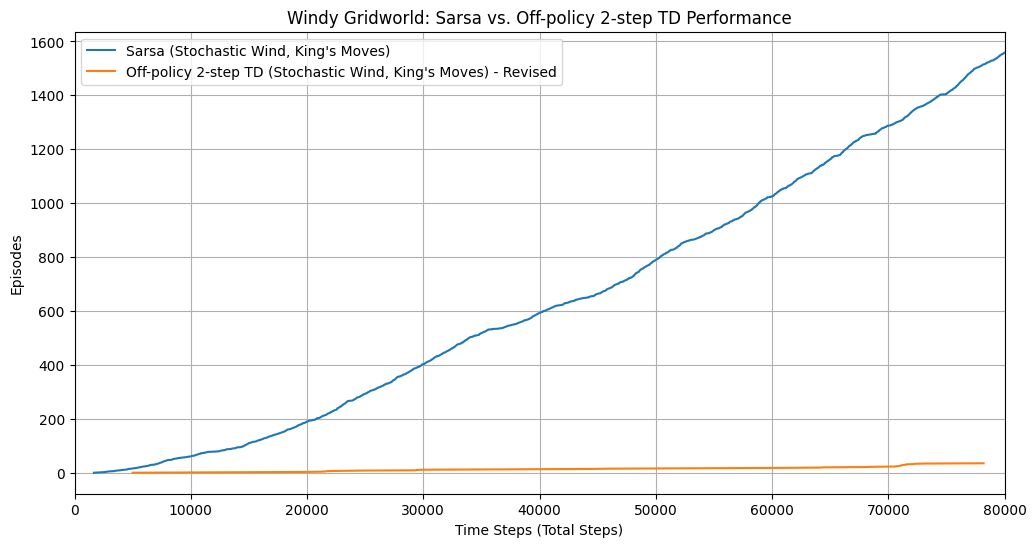


Optimal Trajectory with Off-policy 2-step TD (Stochastic Wind) - Revised:


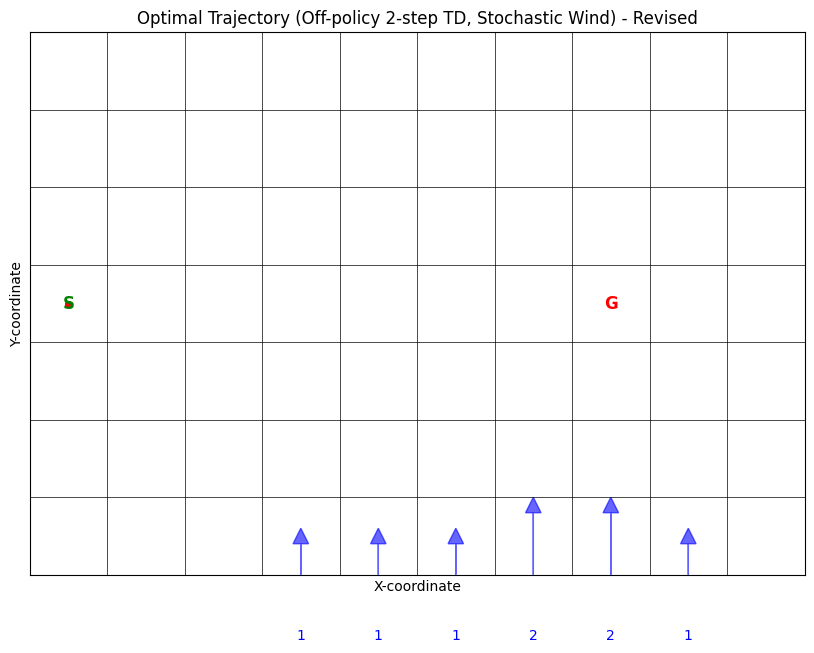

In [4]:
# Off-policy 2-step TD Control (Stochastic Wind, King's Moves)
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# ----- ÌôòÍ≤Ω ÏÑ§Ï†ï -----
GRID_HEIGHT, GRID_WIDTH = 7, 10
START_STATE = (3, 0)
GOAL_STATE  = (3, 7)

# King‚Äôs moves (8Î∞©Ìñ•)
ACTIONS_8 = [(-1, 0), (1, 0), (0, -1), (0, 1),  # ÏÉÅÌïòÏ¢åÏö∞
             (-1, -1), (-1, 1), (1, -1), (1, 1)] # ÎåÄÍ∞ÅÏÑ†

# stochastic wind step Ìï®Ïàò (ÍµêÏàòÎãò ÏΩîÎìúÏóê ÏûàÎçò Í≤É Ïû¨ÏÇ¨Ïö©)
def env_step_stochastic_wind(state, action_idx, actions_set):
    r, c = state
    dr, dc = actions_set[action_idx]
    nr, nc = r + dr, c + dc

    # Î∞îÎûå Ìö®Í≥º (stochastic)
    wind = np.random.choice([0, 1, 2], p=[0.1, 0.8, 0.1])  
    nr -= wind  

    # Í≤ΩÍ≥Ñ Ï≤òÎ¶¨
    nr = max(0, min(GRID_HEIGHT - 1, nr))
    nc = max(0, min(GRID_WIDTH - 1, nc))

    next_state = (nr, nc)
    reward = -1
    return next_state, reward

# epsilon-greedy Ï†ïÏ±Ö (ÌôïÎ•† Ìè¨Ìï® Î≤ÑÏ†Ñ)
def epsilon_greedy_with_probs(Q, state, eps, n_actions):
    r, c = state
    if np.random.rand() < eps:
        a = np.random.randint(n_actions)
    else:
        max_a = np.argwhere(Q[r, c] == np.max(Q[r, c])).flatten()
        a = np.random.choice(max_a)
    probs = np.ones(n_actions) * (eps / n_actions)
    probs[a] += 1.0 - eps
    return a, probs


# ----- Off-policy 2-step TD Control -----
def off_policy_two_step_td_control(num_episodes, actions_set):
    n_actions = len(actions_set)
    Q = np.zeros((GRID_HEIGHT, GRID_WIDTH, n_actions))
    episode_steps = []
    n = 2   # 2-step
    max_steps = 5000  # Î¨¥Ìïú Î£®ÌîÑ Î∞©ÏßÄÏö©

    for ep in tqdm(range(num_episodes), desc="Off-policy 2-step TD"):
        states, actions, rewards = [], [], []
        s = START_STATE
        a, _ = epsilon_greedy_with_probs(Q, s, EPSILON, n_actions)

        states.append(s)
        actions.append(a)

        T = float("inf")
        t = -1
        steps = 0

        while True:
            t += 1
            steps += 1
            if steps > max_steps:
                break

            if t < T:
                s_t = states[t]
                a_t = actions[t]
                s_tp1, r_tp1 = env_step_stochastic_wind(s_t, a_t, actions_set)

                rewards.append(r_tp1)
                states.append(s_tp1)

                if s_tp1 == GOAL_STATE:
                    T = t + 1
                else:
                    a_tp1, _ = epsilon_greedy_with_probs(Q, s_tp1, EPSILON, n_actions)
                    actions.append(a_tp1)

            tau = t - n + 1
            if tau >= 0:
                G = sum([(GAMMA ** i) * rewards[tau + i] for i in range(min(n, T - tau))])
                if tau + n < T:
                    s_tau_n = states[tau + n]
                    G += (GAMMA ** n) * np.max(Q[s_tau_n[0], s_tau_n[1], :])

                s_tau = states[tau]
                a_tau = actions[tau]
                Q[s_tau[0], s_tau[1], a_tau] += ALPHA * (G - Q[s_tau[0], s_tau[1], a_tau])

            if tau == T - 1:
                break

        episode_steps.append(steps)

    return episode_steps, Q


# ----- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ -----
EPSILON = 0.1
ALPHA = 0.5
GAMMA = 1.0
NUM_EPISODES = 8000

# ----- ÌïôÏäµ Ïã§Ìñâ -----
episode_steps_off_policy_2step, Q_off_policy_2step = off_policy_two_step_td_control(NUM_EPISODES, ACTIONS_8)

# ----- Í≤∞Í≥º ÌîåÎ°úÌåÖ (ÍµêÏàòÎãò Í∏∞Ï°¥ Ïä§ÌÉÄÏùºÍ≥º ÎèôÏùº) -----
all_results_ops_comp = [episode_steps_stochastic_8, episode_steps_off_policy_2step]
all_labels_ops_comp = [
    "Sarsa (Stochastic Wind, King's Moves)",
    "Off-policy 2-step TD (Stochastic Wind, King's Moves) - Revised"
]
plot_results(all_results_ops_comp, all_labels_ops_comp,
             "Windy Gridworld: Sarsa vs. Off-policy 2-step TD Performance",
             x_limit=NUM_EPISODES * 10)

# ÏµúÏ†Å Í∂§Ï†Å ÏãúÍ∞ÅÌôî
print("\nOptimal Trajectory with Off-policy 2-step TD (Stochastic Wind) - Revised:")
plot_trajectory(Q_off_policy_2step, ACTIONS_8, START_STATE, GOAL_STATE,
                "Optimal Trajectory (Off-policy 2-step TD, Stochastic Wind) - Revised")

# 6-2. Off-policy 2-step Sarsa for estimating $Q\approx q_\ast$

ÏúÑÏùò 6-1 ÏΩîÎìúÏôÄÏùò Ï∞®Ïù¥Î•º ÏÇ¥Ìé¥ Î≥¥ÏÑ∏Ïöî. 

In [1]:
def _greedy_action(Q, s):
    y, x = s
    q = Q[y, x, :]
    max_as = np.argwhere(q == np.max(q)).flatten()
    return int(np.random.choice(max_as))

def _epsilon_greedy_with_probs(Q, s, epsilon, n_actions):
    y, x = s
    q = Q[y, x, :]
    max_as = np.argwhere(q == np.max(q)).flatten()
    m = len(max_as)
    probs = np.full(n_actions, epsilon / n_actions, dtype=float)
    probs[max_as] += (1.0 - epsilon) / m
    a = int(np.random.choice(np.arange(n_actions), p=probs))
    return a, probs

def two_step_offpolicy_td_control(num_episodes, actions_set):
    """
    Off-policy 2-step TD control with importance sampling.
    behavior policy b: Œµ-greedy wrt Q
    target   policy œÄ: greedy wrt Q (deterministic)
    """
    n = 2
    n_actions = len(actions_set)
    Q = np.zeros((GRID_HEIGHT, GRID_WIDTH, n_actions), dtype=float)
    episode_step_counts = []
    max_steps = 5000  # Î¨¥Ìïú Î£®ÌîÑ Î∞©ÏßÄ

    for ep in tqdm(range(num_episodes), desc="Off-policy 2-step TD"):
        states, actions, rewards = [], [], []

        # Ï¥àÍ∏∞ ÏÉÅÌÉú/ÌñâÎèô (behavior: Œµ-greedy)
        s0 = START_STATE
        a0, _ = _epsilon_greedy_with_probs(Q, s0, EPSILON, n_actions)
        states.append(s0)      # S_0
        actions.append(a0)     # A_0

        T = float('inf')
        t = -1
        steps_this_episode = 0

        while True:
            t += 1
            steps_this_episode += 1
            if steps_this_episode > max_steps:
                # ÎÑàÎ¨¥ Í∏∏Ïñ¥ÏßÄÎ©¥ Ï¢ÖÎ£å
                break

            # ÏïÑÏßÅ Ï¢ÖÎ£å Ï†ÑÏù¥Î©¥ Ìïú Ïä§ÌÖù ÏßÑÌñâÌïòÏó¨ R_{t+1}, S_{t+1} ÌôïÎ≥¥
            if t < T:
                s_t = states[t]
                a_t = actions[t]
                s_tp1, r_tp1 = env_step_stochastic_wind(s_t, a_t, actions_set)
                rewards.append(r_tp1)     # R_{t+1}
                states.append(s_tp1)      # S_{t+1}

                if s_tp1 == GOAL_STATE:
                    T = t + 1
                else:
                    a_tp1, _ = _epsilon_greedy_with_probs(Q, s_tp1, EPSILON, n_actions)
                    actions.append(a_tp1)  # A_{t+1} (behavior)

            # ÏóÖÎç∞Ïù¥Ìä∏ Ïù∏Îç±Ïä§ œÑ = t - n + 1 (n=2 ‚Üí œÑ = t-1)
            tau = t - n + 1

            if tau >= 0:
                # 2-step return G_œÑ = R_{œÑ+1} + Œ≥ R_{œÑ+2} + Œ≥^2 Q(S_{œÑ+2}, œÄ(S_{œÑ+2}))
                G = 0.0
                # R_{œÑ+1}
                G += rewards[tau]
                # Œ≥ * R_{œÑ+2}
                if tau + 1 < T:
                    G += GAMMA * rewards[tau + 1]
                # Œ≥^2 * Î∂ÄÌä∏Ïä§Ìä∏Îû© Ìï≠
                if tau + 2 < T:
                    s_tpn = states[tau + 2]
                    a_tpn = _greedy_action(Q, s_tpn)  # œÄ: greedy
                    G += (GAMMA ** 2) * Q[s_tpn[0], s_tpn[1], a_tpn]

                # Ï§ëÏöîÎèÑ ÎπÑÏú® œÅ_{œÑ+1 : min(œÑ+2, T-1)}
                # œÄÎäî Í≤∞Ï†ïÏ†Å greedy, bÎäî Œµ-greedy
                rho = 1.0
                upper = int(min(tau + n, T - 1))
                for k in range(tau + 1, upper + 1):
                    s_k = states[k]
                    # ÌñâÎèô Î≤ÑÌçºÏóê Î∞òÎìúÏãú Ï°¥Ïû¨ÌïòÎèÑÎ°ù Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏúºÎÇò, Î∞©Ïñ¥Ï†ÅÏúºÎ°ú Ï≤òÎ¶¨
                    a_k = actions[k] if k < len(actions) else _greedy_action(Q, s_k)
                    # œÄ(a|s): greedyÎ©¥ 1, ÏïÑÎãàÎ©¥ 0
                    pi_prob = 1.0 if a_k == _greedy_action(Q, s_k) else 0.0
                    # b(a|s): Œµ-greedy ÌôïÎ•†ÏùÑ Ïû¨Í≥ÑÏÇ∞
                    _, b_probs = _epsilon_greedy_with_probs(Q, s_k, EPSILON, n_actions)
                    b_prob = b_probs[a_k]
                    if b_prob <= 0.0:
                        rho = 0.0
                        break
                    rho *= (pi_prob / b_prob)
                    if rho == 0.0:
                        break

                # Q(S_œÑ, A_œÑ) ÏóÖÎç∞Ïù¥Ìä∏
                s_tau = states[tau]
                a_tau = actions[tau]
                Q[s_tau[0], s_tau[1], a_tau] += ALPHA * rho * (G - Q[s_tau[0], s_tau[1], a_tau])

            # Î™®Îì† ÌïÑÏöî ÏóÖÎç∞Ïù¥Ìä∏Í∞Ä ÎÅùÎÇ¨ÏúºÎ©¥ Ï¢ÖÎ£å
            if tau == T - 1:
                break

        episode_step_counts.append(steps_this_episode)

    return episode_step_counts, Q

# ÌïôÏäµ Ïã§Ìñâ ÏòàÏãú
NUM_EPISODES = 20000
episode_steps_off2, Q_off2 = two_step_offpolicy_td_control(NUM_EPISODES, ACTIONS_8)

# Í∏∞Ï°¥Í≥º ÎèôÏùºÌïú Î∞©ÏãùÏúºÎ°ú ÏãúÍ∞ÅÌôî Ìò∏Ï∂ú
all_results_ops_comp = [episode_steps_stochastic_8, episode_steps_off2]
all_labels_ops_comp  = ["Sarsa (Stochastic Wind, King's Moves)",
                        "Off-policy 2-step TD (Stochastic Wind, King's Moves) ‚Äî IS"]
plot_results(all_results_ops_comp, all_labels_ops_comp,
             "Windy Gridworld: Sarsa vs. Off-policy 2-step TD Performance",
             x_limit=NUM_EPISODES * 10)

print("\nOptimal Trajectory with Off-policy 2-step TD (Greedy):")
plot_trajectory(Q_off2, ACTIONS_8, START_STATE, GOAL_STATE, "Optimal Trajectory (Off-policy 2-step TD, Greedy)")

NameError: name 'ACTIONS_8' is not defined